<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats

In [ ]:
import statsmodels.api as sm

#### Read the data

Load the csv file and print the first five observations.

In [ ]:
df= pd.read_csv('/content/diamond_data.csv')
df.shape

(1547, 9)

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


0.4383878452014628


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


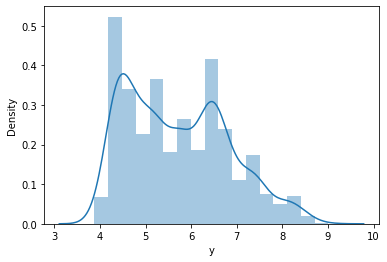

In [ ]:
print(df['y'].skew())

sns.distplot(df['y'])
plt.show()

In [ ]:
# yes, it is skewed. 

#we can use a log transform. 

df['log_width'] = np.log1p(df['y'])

In [ ]:
df.head()

,carat,cut,color,depth,table,price,x,y,z,log_width
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63,1.671473
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58,1.908060
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79,2.149434
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93,2.028148
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23,1.814825


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1= pd.get_dummies(columns=['cut', 'color'], data=df, drop_first=True)
df1.head()

,carat,depth,table,price,x,y,z,log_width,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,61.1,61.0,682,4.29,4.32,2.63,1.671473,1,0,0,0,0,1,0,0,0,0
1,0.72,62.0,56.0,2443,5.80,5.74,3.58,1.908060,0,1,0,0,0,0,0,1,0,0
2,1.71,62.9,58.0,8848,7.64,7.58,4.79,2.149434,0,0,1,0,0,0,0,0,0,1
3,1.01,59.2,59.0,7287,6.67,6.60,3.93,2.028148,0,0,1,0,1,0,0,0,0,0
4,0.52,62.7,56.0,1720,5.17,5.14,3.23,1.814825,0,1,0,0,0,0,0,0,0,0


In [ ]:
df1.drop({'log_width'}, axis=1, inplace= True)

In [ ]:
prc= df1['price']
df1.drop({'price'}, axis=1, inplace=True)

In [ ]:
xc= sm.add_constant(df1)
md= sm.OLS(prc, df1).fit()
print(md.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1609.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        11:30:28   Log-Likelihood:                         -13345.
No. Observations:                1547   AIC:                                  2.672e+04
Df Residuals:                    1531   BIC:                                  2.681e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# we can create a ACF map

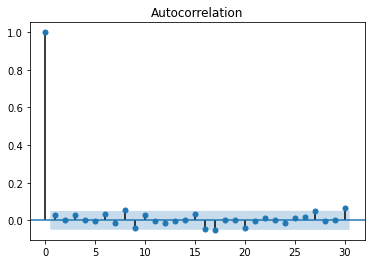

In [ ]:
import statsmodels
statsmodels.graphics.tsaplots.plot_acf(md.resid, lags=30)
plt.show()

In [ ]:
# The Durbin-Watson: 1.945 is the score which is close to 2- so not much autocorrelation.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Sequential Feature Selection
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr = LinearRegression()
sfs_ = sfs(lr, df1.shape[1], forward=True, scoring='r2', cv=3)
sfs_.fit(df1, prc)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=16, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
sf= pd.DataFrame(sfs_.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.8638662187264315, 0.8691929354535461, 0.846...",0.859927,"(carat,)"
2,"(0, 5)","[0.8758004347703768, 0.8773869508147605, 0.856...",0.869823,"(carat, z)"
3,"(0, 5, 15)","[0.8842995248347789, 0.8837275270327403, 0.864...",0.877418,"(carat, z, color_J)"
4,"(0, 2, 5, 15)","[0.8854989514934241, 0.8876275346086232, 0.867...",0.880044,"(carat, table, z, color_J)"
5,"(0, 2, 5, 14, 15)","[0.8824130719213026, 0.8928854302262886, 0.872...",0.882522,"(carat, table, z, color_I, color_J)"
6,"(0, 2, 5, 13, 14, 15)","[0.8841123679753331, 0.8959615888368757, 0.875...",0.885168,"(carat, table, z, color_H, color_I, color_J)"
7,"(0, 2, 3, 5, 13, 14, 15)","[0.8849295209779836, 0.8967929272517233, 0.875...",0.88574,"(carat, table, x, z, color_H, color_I, color_J)"
8,"(0, 2, 3, 4, 5, 13, 14, 15)","[0.8855030294938624, 0.8981573116592435, 0.875...",0.886531,"(carat, table, x, y, z, color_H, color_I, colo..."
9,"(0, 2, 3, 4, 5, 7, 13, 14, 15)","[0.8860103086783494, 0.8992238964041162, 0.875...",0.887019,"(carat, table, x, y, z, cut_Ideal, color_H, co..."
10,"(0, 2, 3, 4, 5, 6, 7, 13, 14, 15)","[0.8861658479528051, 0.8996918785865546, 0.875...",0.887156,"(carat, table, x, y, z, cut_Good, cut_Ideal, c..."


In [ ]:
# the above shown are the features in ascending order.

In [ ]:
# max accuracy

list(sf[sf['avg_score']==sf['avg_score'].max()]['feature_names'])

[('carat',
  'depth',
  'table',
  'x',
  'y',
  'z',
  'cut_Good',
  'cut_Ideal',
  'cut_Premium',
  'cut_Very Good',
  'color_G',
  'color_H',
  'color_I',
  'color_J')]

In [ ]:
sf[sf['avg_score']==sf['avg_score'].max()] # 88.7%

,feature_idx,cv_scores,avg_score,feature_names
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15)","[0.8857843593517338, 0.8999420464783885, 0.877...",0.887722,"(carat, depth, table, x, y, z, cut_Good, cut_I..."


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import cross_val_score
ar = LinearRegression()
Kf = KFold(n_splits=5, shuffle=True, random_state=4)
cv = cross_val_score(ar, df1, prc, scoring = 'r2', cv=Kf)
cv

array([0.89701999, 0.85653254, 0.90035416, 0.9062447 , 0.88694874])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xc= sm.add_constant(df1)
md= sm.OLS(prc, df1).fit()
print(md.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1609.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        11:30:30   Log-Likelihood:                         -13345.
No. Observations:                1547   AIC:                                  2.672e+04
Df Residuals:                    1531   BIC:                                  2.681e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# the color which are- E as the p value is close to 1 and the coeff are far from impactful. 
# color F and color G are also not significantly contributing much
# after color, Table is not contributing much. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


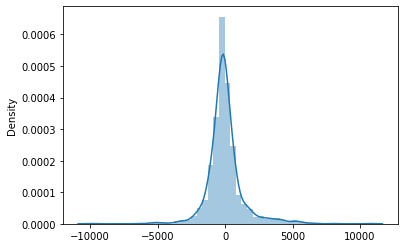

In [ ]:
sns.distplot(md.resid)

In [ ]:
# it looks normal. Lets do a JB test

In [ ]:
import scipy.stats as stats

In [ ]:
stats.jarque_bera(md.resid)

(5972.038195570586, 0.0)

In [ ]:
# It is NOT normally distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# we can transform the features to make the residuals normal.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


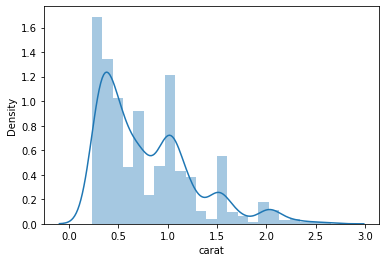

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


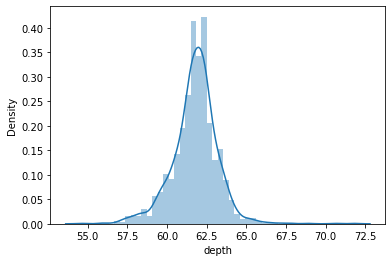

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


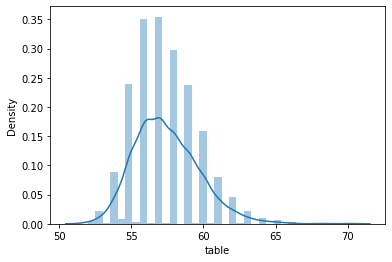

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


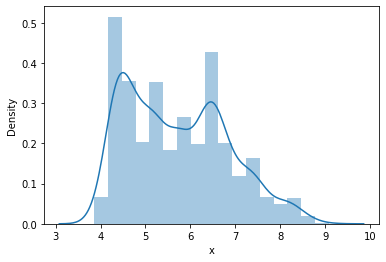

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


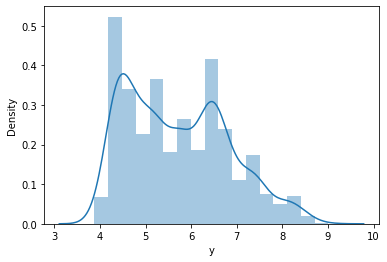

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


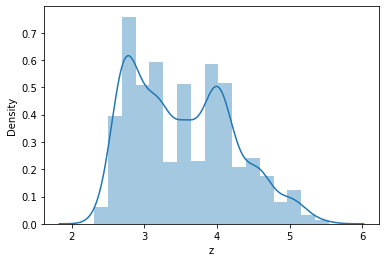

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


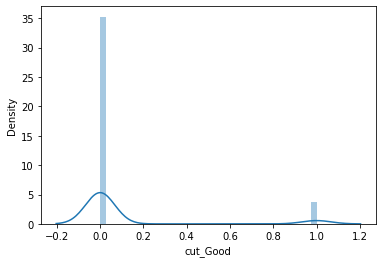

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


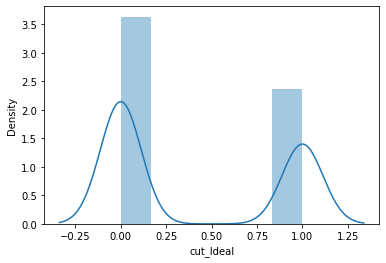

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


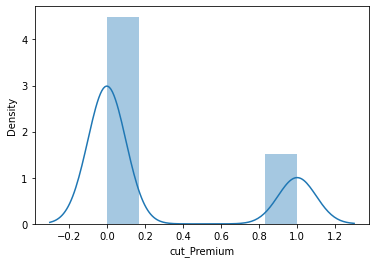

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


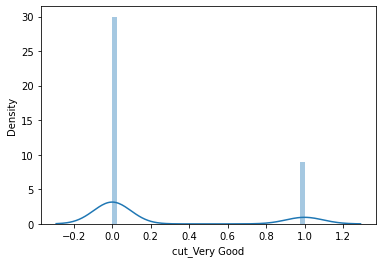

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


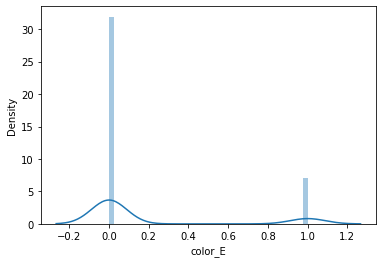

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


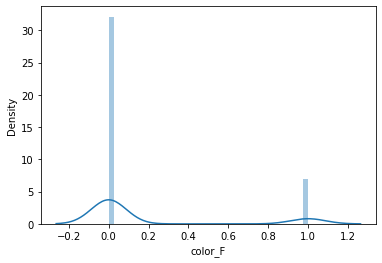

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


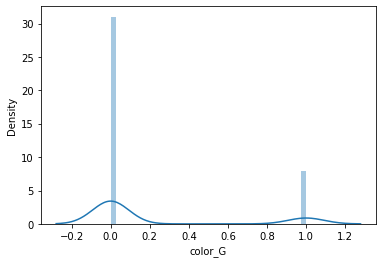

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


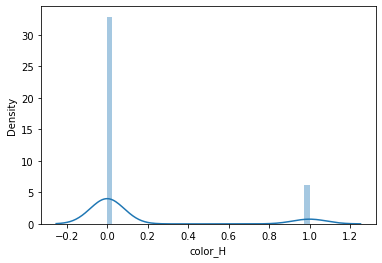

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


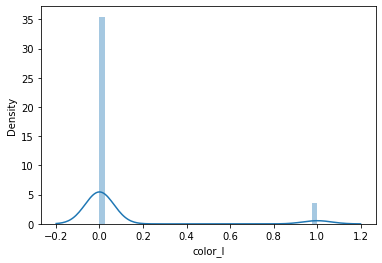

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


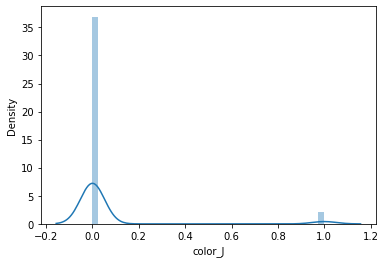

In [ ]:
for i in df1.columns:
  sns.distplot(df1[i])
  plt.show()

In [ ]:
# we could power transform the data and look at it. 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit_transform(df1)

array([[-1.34541293, -0.46035595,  1.50166295, ..., -0.43273568,
        -0.31667727, -0.23961692],
       [ 0.12881703,  0.1648191 , -0.60959551, ...,  2.31087947,
        -0.31667727, -0.23961692],
       [ 1.59559908,  0.79031155,  0.35447907, ..., -0.43273568,
        -0.31667727,  4.17332801],
       ...,
       [-0.52201403,  0.512276  , -0.10458032, ..., -0.43273568,
        -0.31667727,  4.17332801],
       [ 1.3969045 ,  1.41611708, -0.10458032, ...,  2.31087947,
        -0.31667727, -0.23961692],
       [-0.81859437, -0.87696081,  0.77244029, ..., -0.43273568,
        -0.31667727, -0.23961692]])

In [ ]:
df_n = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

In [ ]:
prc_2 = pt.fit_transform([prc])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
prc_2.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
df_n.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_F,color_G,color_H,color_I,color_J
0,-1.345413,-0.460356,1.501663,-1.415486,-1.394715,-1.460974,3.074525,-0.807947,-0.579590,-0.54872,2.155455,-0.507665,-0.432736,-0.316677,-0.239617
1,0.128817,0.164819,-0.609596,0.214317,0.161156,0.210441,-0.325254,1.237705,-0.579590,-0.54872,-0.463939,-0.507665,2.310879,-0.316677,-0.239617
2,1.595599,0.790312,0.354479,1.537702,1.511564,1.612912,-0.325254,-0.807947,1.725359,-0.54872,-0.463939,-0.507665,-0.432736,-0.316677,4.173328
3,0.736261,-1.779108,0.772440,0.905570,0.860568,0.679184,-0.325254,-0.807947,1.725359,-0.54872,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
4,-0.453599,0.651286,-0.609596,-0.385110,-0.422435,-0.327055,-0.325254,1.237705,-0.579590,-0.54872,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617


In [ ]:
xc= sm.add_constant(df_n)
md= sm.OLS(prc, df1).fit()
print(md.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1609.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        11:30:40   Log-Likelihood:                         -13345.
No. Observations:                1547   AIC:                                  2.672e+04
Df Residuals:                    1531   BIC:                                  2.681e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


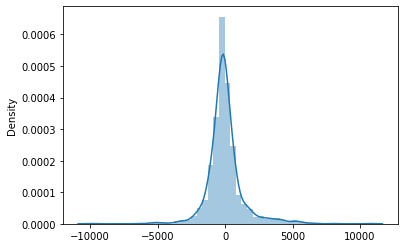

In [ ]:
sns.distplot(md.resid)

In [ ]:
# JB test

stats.jarque_bera(md.resid)

(5972.038195570586, 0.0)

In [ ]:
# SInce a JB test is very strict, we are still not able to convince the normality of the residuals. 

# But yes, Power transform and selecting important features do help.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df_r = df1.copy()

In [ ]:
df1.shape

(1547, 8)

In [ ]:
for i in range(15,7,-1):
  xc= sm.add_constant(df1)
  md= sm.OLS(prc, df1).fit()
  print('with {} features, {} is r_square'.format(i, md.rsquared_adj))
  print(md.summary())
  r= dict(md.pvalues)
  try:
    df1.drop({max(r, key=r.get)}, axis=1, inplace=True)
  except KeyError:
    pass

with 15 features, 0.9432757137717583 is r_square
with 14 features, 0.9433127363992583 is r_square
with 13 features, 0.9433434376918935 is r_square
with 12 features, 0.9432580769388812 is r_square
with 11 features, 0.9431307995157426 is r_square
with 10 features, 0.9429580470896936 is r_square
with 9 features, 0.9425637343233111 is r_square
with 8 features, 0.9423509882375876 is r_square


In [ ]:
# we are left with these variable:

df1.head()

,carat,depth,z,cut_Ideal,cut_Very Good,color_H,color_I,color_J
0,0.30,61.1,2.63,0,0,0,0,0
1,0.72,62.0,3.58,1,0,1,0,0
2,1.71,62.9,4.79,0,0,0,0,1
3,1.01,59.2,3.93,0,0,0,0,0
4,0.52,62.7,3.23,1,0,0,0,0


In [ ]:
df_n.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
xc= sm.add_constant(df_r)
md= sm.OLS(prc, df_r).fit()
print(md.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1609.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        12:00:47   Log-Likelihood:                         -13345.
No. Observations:                1547   AIC:                                  2.672e+04
Df Residuals:                    1531   BIC:                                  2.681e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# the color which are- E as the p value is close to 1 and the coeff are far from impactful. 
# color F and color G are also not significantly contributing much

# its E,F and G

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.feature_selection import RFE
ar = LinearRegression()
rfe_ = RFE(ar, n_features_to_select = 5)
rfe_.fit(df_r, prc)

al = pd.DataFrame(rfe_.ranking_, index=df_r.columns, columns=['ranks'])

In [ ]:
al.loc[al['ranks'] == 1]

,ranks
carat,1
x,1
y,1
z,1
color_J,1


In [ ]:
rr= al.loc[al['ranks'] == 1].index
df_new= df_r[rr]
df_new.head()

,carat,x,y,z,color_J
0,0.30,4.29,4.32,2.63,0
1,0.72,5.80,5.74,3.58,0
2,1.71,7.64,7.58,4.79,1
3,1.01,6.67,6.60,3.93,0
4,0.52,5.17,5.14,3.23,0


In [ ]:
xc= sm.add_constant(df_new)
md= sm.OLS(prc, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     2288.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:13:48   Log-Likelihood:                -13422.
No. Observations:                1547   AIC:                         2.686e+04
Df Residuals:                    1541   BIC:                         2.689e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5253.1375    639.972      8.208      0.0